In [1]:
import os
import cv2
import numpy as np
from helper_funcions import PeopleFeatures, TimeMeasurement, image_equalization_clahe, save_people_images
from helper_functions_analysis import show_distances_distributions, get_performance_v2, error_analysis, draw_error_analysis, get_tri_distance_matrix, plot_confusion_matrix

In [2]:
# => People features extractor

people_model = PeopleFeatures()

INFO:tensorflow:Scale of 0 disables regularizer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
INFO:tensorflow:Restoring parameters from /home/asoriano/Escritorio/spaceai-evolution/Models/person_embedding_tf/checkpoint-25000


In [3]:
# => Reading dataset

from glob import glob

def get_images_in_dir(dir):
    files = []
    for ext in list(["*.jpg", "*.jpeg", "*.png"]):
        files.extend(glob(os.path.join(dir, ext)))
        
    return files

subdirectories_images_list = []
for subdirectory in glob(os.path.join("/home/asoriano/workspace/pocs/eval_tracker_person_embs/data/images/only_area", "*/")):
    files = get_images_in_dir(subdirectory)
    subdirectories_images_list.extend([(f, os.path.split(subdirectory[:-1])[1]) for f in files])

In [4]:
db_full_names = []
db_names = []
db_names_in_out = []
db_in_out = []
db_embs = []
for img_path, name in subdirectories_images_list:
    db_full_names.append(name)
    db_names.append(name.split("_")[0])
    db_names_in_out.append("_".join(name.split("_")[0:2]))
    db_in_out.append(name.split("_")[1])
    db_embs.append(people_model.human_vector(cv2.imread(img_path)).flatten())

In [ ]:
show_distances_distributions(db_names, db_embs)

In [ ]:
show_distances_distributions(db_names_in_out, db_embs)

In [ ]:
show_distances_distributions(db_in_out, db_embs)

In [5]:
train_db = [(name, emb) for in_out, name, emb in zip(db_in_out, db_names, db_embs) if in_out == "in"]
eval_db = [(name, emb) for in_out, name, emb in zip(db_in_out, db_names, db_embs) if in_out == "out"]

train_db_name, train_db_emb = zip(*train_db)
eval_db_name, eval_db_emb = zip(*eval_db)

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
from sklearn.neighbors import NearestNeighbors
from collections import Counter
import itertools

In [7]:
def get_performances(ks, train_names, train_embs, eval_names, eval_embs):
    for k in ks:
        print("--------------------------------------------")
        print("  => Performance with k=%s" % k)
        print("--------------------------------------------")
        
        knn_model = NearestNeighbors(n_neighbors=k, algorithm="auto", metric='euclidean').fit(train_embs)
        distances, indices = knn_model.kneighbors(eval_embs)
        predictions = np.array(train_names)[indices]
        decisions = []
        for pred in predictions:
            c = Counter(pred)
            most_common, num_most_common = c.most_common(1)[0]
            decisions.append(most_common)        
        labels = list(set(eval_db_name))
        cnf_matrix = confusion_matrix(eval_db_name, decisions, labels=labels)
        plot_confusion_matrix(cnf_matrix, labels)

--------------------------------------------
  => Performance with k=1
--------------------------------------------
Confusion matrix, without normalization
[[38  0  2  0  3  0]
 [ 0 20  2  0 14  0]
 [ 0  0 11  3  0  0]
 [ 0  0  3 28  0  0]
 [ 0  0  0  0 20  0]
 [ 0 26  0  0 18  1]]


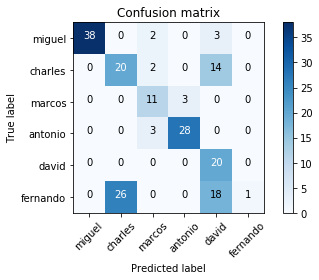

--------------------------------------------
  => Performance with k=3
--------------------------------------------
Confusion matrix, without normalization
[[38  0  2  0  3  0]
 [ 0 17  1  0 18  0]
 [ 0  0 12  2  0  0]
 [ 0  0  1 30  0  0]
 [ 0  0  0  0 20  0]
 [ 0 22  0  0 22  1]]


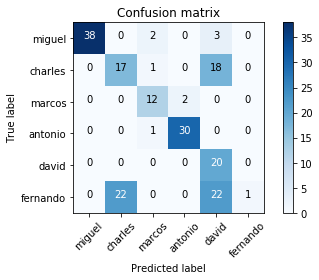

--------------------------------------------
  => Performance with k=5
--------------------------------------------
Confusion matrix, without normalization
[[37  0  2  0  4  0]
 [ 0 19  1  0 16  0]
 [ 0  0 13  1  0  0]
 [ 0  0  2 29  0  0]
 [ 0  0  0  0 20  0]
 [ 0 23  0  0 21  1]]


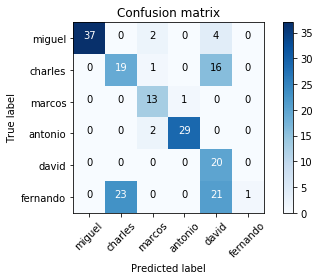

--------------------------------------------
  => Performance with k=7
--------------------------------------------
Confusion matrix, without normalization
[[39  0  1  0  3  0]
 [ 0 20  0  0 16  0]
 [ 0  0 13  1  0  0]
 [ 0  0  2 29  0  0]
 [ 0  0  0  0 20  0]
 [ 0 23  0  0 20  2]]


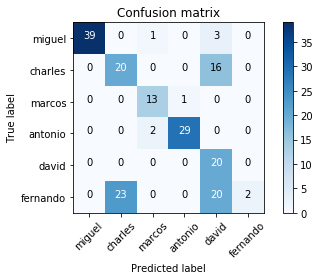

--------------------------------------------
  => Performance with k=15
--------------------------------------------
Confusion matrix, without normalization
[[37  0  2  0  4  0]
 [ 0 19  0  0 17  0]
 [ 0  0 10  4  0  0]
 [ 0  0  2 29  0  0]
 [ 0  0  0  0 20  0]
 [ 0 26  0  0 18  1]]


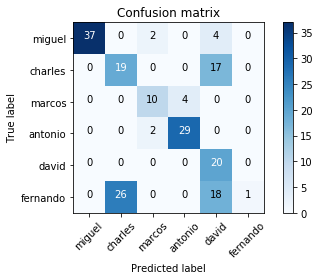

In [8]:
get_performances([1, 3, 5, 7, 15], train_db_name, train_db_emb, eval_db_name, eval_db_emb)

In [ ]:
knn_model = NearestNeighbors(n_neighbors=3, algorithm="auto", metric='euclidean').fit(train_db_emb)

In [ ]:
distances, indices = knn_model.kneighbors(eval_db_emb)

In [ ]:
predictions = np.array(train_db_name)[indices]

In [ ]:
decisions = []
for pred in predictions:
    c = Counter(pred)
    most_common, num_most_common = c.most_common(1)[0]
    decisions.append(most_common)

In [ ]:
decisions

In [ ]:
labels = list(set(eval_db_name))

In [ ]:
cnf_matrix = confusion_matrix(eval_db_name, decisions, labels=labels)

In [ ]:
cnf_matrix

In [ ]:
plot_confusion_matrix(cnf_matrix, labels)